In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

from eoles.write_output import get_total_system_costs, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand, colormap_simulations
from pathlib import Path
from project.write_output import plot_compare_scenarios

# New comparisons

## Loading scenarios

In [2]:
scenarios = pd.read_csv(Path('eoles') / Path('inputs') / Path('xps') / Path('20240220') / Path('scenarios.csv'), index_col=0)

## Loading outputs

In [3]:
dict_output = {}
# list all files in a folder with path folderpath 
folderpath = Path('eoles') / Path('outputs') / Path('20240220')
for path in folderpath.iterdir():
    if path.is_dir():
        dict_output[path.name.split('_')[1]] = path

output = get_total_system_costs(dict_output)
output = pd.concat([output[k] for k in output.keys()], axis=0)

scenarios_complete = pd.concat([scenarios, output.T], axis=1)
scenarios_complete.to_csv(Path('eoles') / Path('outputs') / Path('20240220') / Path('scenarios_complete.csv'))

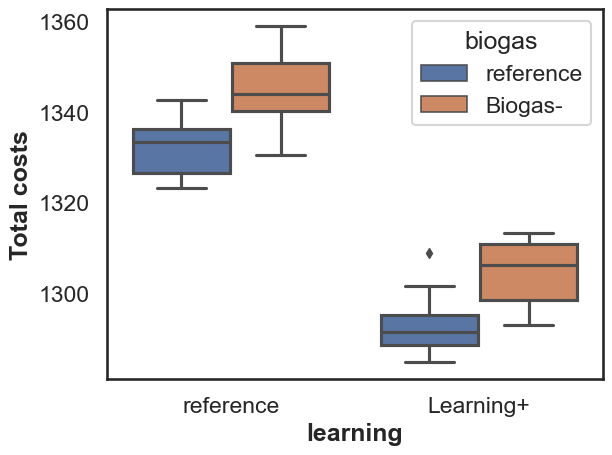

In [12]:
sns.boxplot(data=scenarios_complete, x='learning', y='Total costs', hue='biogas')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'add_patch'

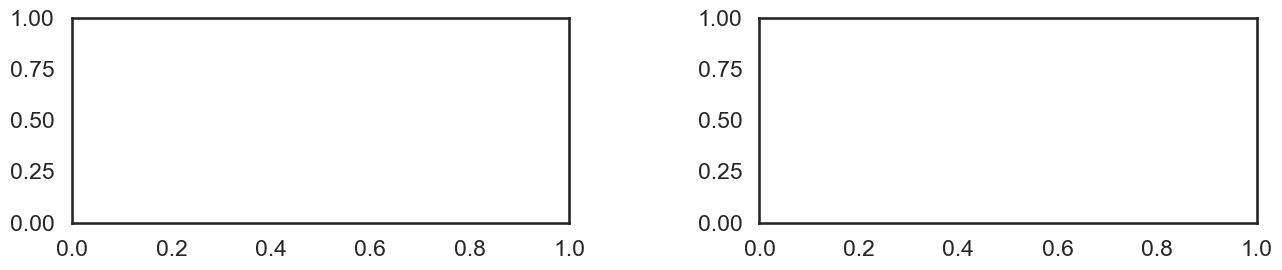

In [14]:
L = ['learning', 'elasticity']  # Add your variable names here

# Define the number of rows and columns for subplots based on the length of L
n = len(L)
ncols = 2  # Define number of columns per row
nrows = n // ncols + (n % ncols > 0)  # Calculate required number of rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
fig.tight_layout(pad=5.0)

# Flatten axes array if more than one row
if nrows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterate over variables and create a boxplot for each
for i, variable in enumerate(L):
    sns.boxplot(data=scenarios_complete, x=variable, y='Total costs', hue='biogas', ax=axes[i])
    axes[i].set_title(f'Boxplot of Total costs by {variable} and biogas')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any unused subplots if L does not fill up the entire grid
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.show()

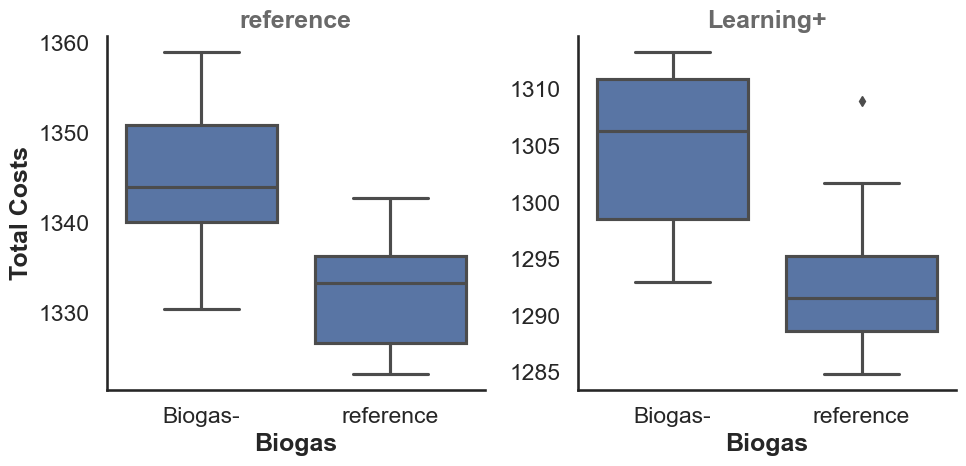

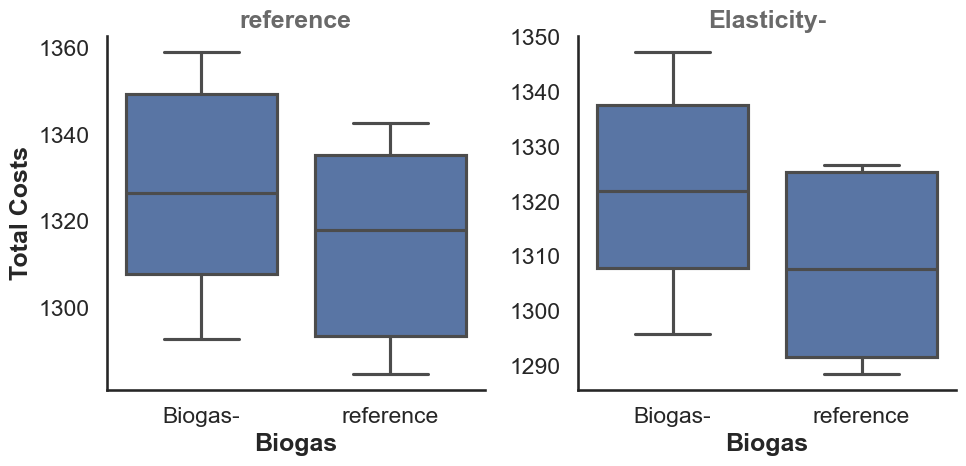

In [13]:
L = ['learning', 'elasticity']  # Add your variables here

for variable in L:
    # Create a FacetGrid for each variable. Since we are not faceting by row or column, we use hue.
    g = sns.FacetGrid(scenarios_complete, col=variable, col_wrap=2, sharex=False, sharey=False, height=5, aspect=1)
    
    # Map a boxplot to the FacetGrid
    g.map(sns.boxplot, 'biogas', 'Total costs', order=sorted(scenarios_complete['biogas'].unique()))
    
    # Adjust the axis labels and plot titles as needed
    g.set_axis_labels('Biogas', 'Total Costs')
    g.set_titles('{col_name}')

    # Adjust the layout so titles and labels don't overlap
    g.fig.tight_layout(w_pad=1)
    
    # Show the plot
plt.show()

# Comparison policy scenarios costs

AttributeError: 'NoneType' object has no attribute 'loc'

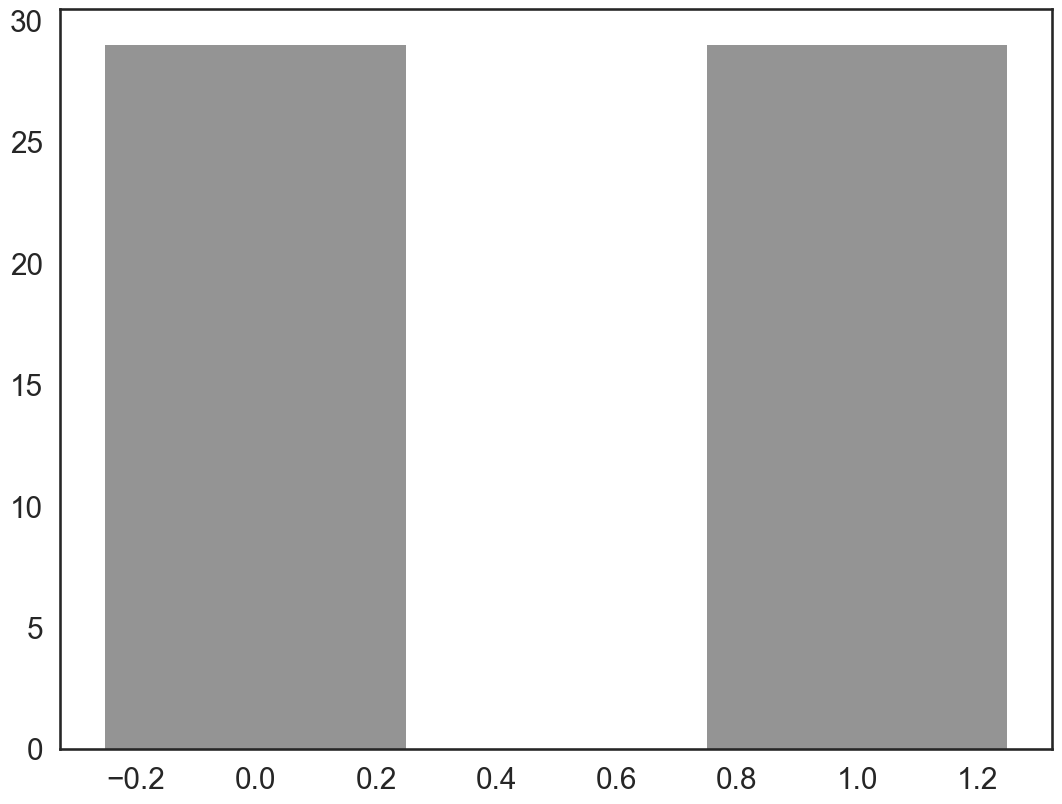

In [3]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=1.3)
dict_output = {
     # '': {
     #    "Ambitious": os.path.join("eoles/outputs/20231210/1211010909_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyambitious"),
     #    "Ban": os.path.join("eoles/outputs/20231210/1211004148_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyban"),
     #    "Ban no policy": os.path.join("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy"),
     #     "Ban ref": os.path.join("eoles/outputs/20231210/1211010852_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybanref"),
     #   # "Carbon tax": os.path.join("eoles/outputs/20231210/1211012604_biogasS3_capacityN1_demandReindustrialisation_profileReference_policycarbontax"),
     #    # "Reference": os.path.join("eoles/outputs/20231210/1211010746_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyreference"),
     # },
         '': {
        "Ambitious": os.path.join("eoles/outputs/20231210/1211004316_biogasS3_capacityN1_demandReference_profileReference_policyambitious"),
        "Ban": os.path.join("eoles/outputs/20231210/1210235222_biogasS3_capacityN1_demandReference_profileReference_policyban"),
        "Ban no policy": os.path.join("eoles/outputs/20231210/1210235104_biogasS3_capacityN1_demandReference_profileReference_policybannopolicy"),
         "Ban ref": os.path.join("eoles/outputs/20231210/1211001733_biogasS3_capacityN1_demandReference_profileReference_policybanref"),
        "Carbon tax": os.path.join("eoles/outputs/20231210/1211010310_biogasS3_capacityN1_demandReference_profileReference_policycarbontax"),
        "Reference": os.path.join("eoles/outputs/20231210/1211004541_biogasS3_capacityN1_demandReference_profileReference_policyreference"),
     },
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"].rename(columns={2049:2050})

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/122023_ban")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False, secondary_y='Proportional',
    secondary_axis_spec={'y_min': 0, 'y_max': 120, 'title': 'Subsidies (€/TWh)'}, waterfall=True)

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Reference")

# Sensitivity analysis

In [4]:
total_system_costs_2050_df = colormap_simulations(overall_folder=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  config_ref=None,
                                                  save_path=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  subset_configs=['Ban', 'BanRef', 'BanNoPolicy'],
                                                  percent=True,
                                                  reorder=['BanRef', 'BanNoPolicy'],
                                                  dict_scenario={
                                                      'BanRef': 'Package 2021 + Ban',
                                                      'BanNoPolicy': 'No Policy + Ban'
                                                  },
                                                  dict_config_demandsupply={
                                                      'Elasticity-': 'Lower Elasticity HP',
                                                      'LearningHP+': 'Technical Progress HP',
                                                      'biogasBiogas-': 'Lower Biogas Potential',
                                                      'capaNuc-': 'Lower Nuclear Potential',
                                                      'capaRen-': 'Lower Renewable Potential',
                                                      'capaRen+': 'Higher Renewable Potential',
                                                      'costscostsREN+': 'Higher Renewable Costs',
                                                      'demandReindustrialisation': 'Higher Electricity Demand',
                                                      'demandSobriete': 'Lower Electricity Demand',
                                                      'weather2012': 'Colder Weather'
                                                  }
                                                    )

# Hourly balance

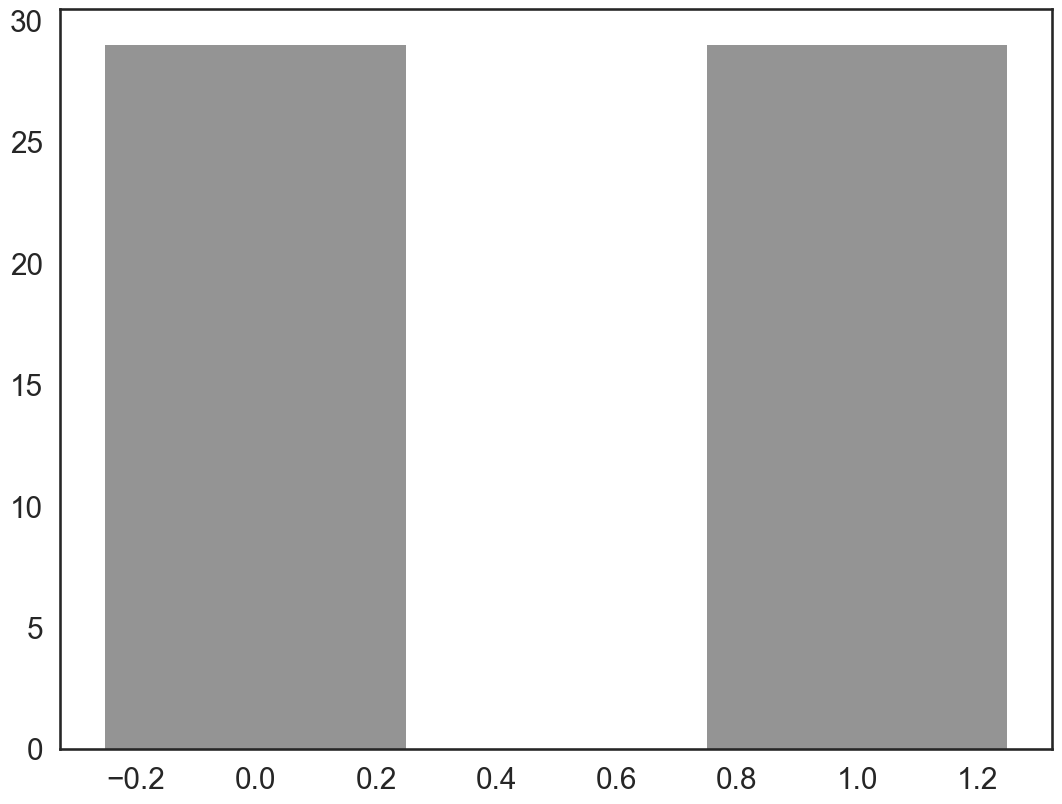

In [35]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [2]:
date_start, date_end = datetime.datetime(2006, 6, 7, 0, 0), datetime.datetime(2006, 6, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [29]:
hourly_generation.loc[(hourly_generation.hydrogen_in > 0) & (hourly_generation.hydrogen > 0)]

In [30]:
hourly_generation.hydrogen_charge.plot()

count    8760.000000
mean        4.584872
std         2.991499
min         0.000000
25%         4.212162
50%         4.566210
75%         6.055786
max         8.953740
Name: electrolysis, dtype: float64

In [31]:
hourly_generation.hydrogen.iloc[0:1000].plot()

In [34]:
begin, end = 4000, 4050
hourly_generation.hydrogen_in.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.hydrogen.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.electrolysis.iloc[begin:end].plot(c='black', label='electrolysis')
hourly_generation.H2_demand.iloc[begin:end].plot(c='red')

0       28.181125
1       29.091650
2       29.437800
3       29.430275
4       29.106700
          ...    
8755    24.034850
8756    24.080000
8757    23.929500
8758    23.666125
8759    23.417800
Name: offshore_f, Length: 8760, dtype: float64

In [6]:
hourly_generation.hydrogen_in.describe()